In [436]:
#importing all the required libraries for openCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [437]:
#getting the image from the location folder on the PC
IMAGE_DIRECTORY = r"C:\Users\Vilas_2\pics"
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'RED': [255, 0, 0]
}
images = []

for file in os.listdir(r"C:\Users\Vilas_2\pics"):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(r'C:\Users\Vilas_2\pics', file)))

In [438]:
#method to match the color 

def match_image_by_color(image, color, threshold = 60, number_of_colors = 1): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [439]:
#method to show the image and the closest RGB color name

def show_selected_images(images, color, threshold, colors_to_match):
    
    index = 1
    a=0
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            a=1
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1
            return a

In [440]:
# Search for GREEN

plt.figure(figsize = (20, 10))
b=show_selected_images(images, COLORS['GREEN'], 60, 1)
if(b==1):
    print("GREEN")

<Figure size 1440x720 with 0 Axes>

BLUE


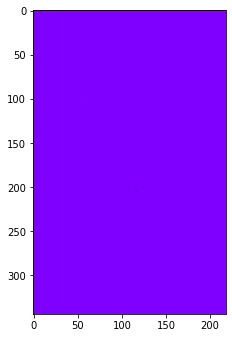

In [441]:
# Search for BLUE

plt.figure(figsize = (20, 10))
b=show_selected_images(images, COLORS['BLUE'], 60, 1)
if(b==1):
    print("BLUE")

In [442]:
# Search for RED

plt.figure(figsize = (20, 10))
b=show_selected_images(images, COLORS['RED'], 60, 1)
if(b==1):
    print("RED")

<Figure size 1440x720 with 0 Axes>